# This Notebook corresponds to the second exercise at the first TP.

Exercise: Data Cleaning and Preparation

Objective: Handling missing and inconsistent data

Task:
Donwload [Iris dataset](https://www.kaggle.com/datasets/bharathkumarkathula/iris-with-missing-data) and put it  inside dataset folder in your project folder.

##### Library importation:

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### Loading dataset:

In [49]:
dataset= "./../dataset/Iris_missingdata.csv"
data = pd.read_csv(dataset)

##### Display columns:

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  139 non-null    float64
 2   SepalWidthCm   143 non-null    float64
 3   PetalLengthCm  142 non-null    float64
 4   PetalWidthCm   141 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### Display head dataset:

In [51]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Check for missing values:

In [52]:
data.isnull().sum()

Id                0
SepalLengthCm    11
SepalWidthCm      7
PetalLengthCm     8
PetalWidthCm      9
Species           0
dtype: int64

additional plot for display missing values

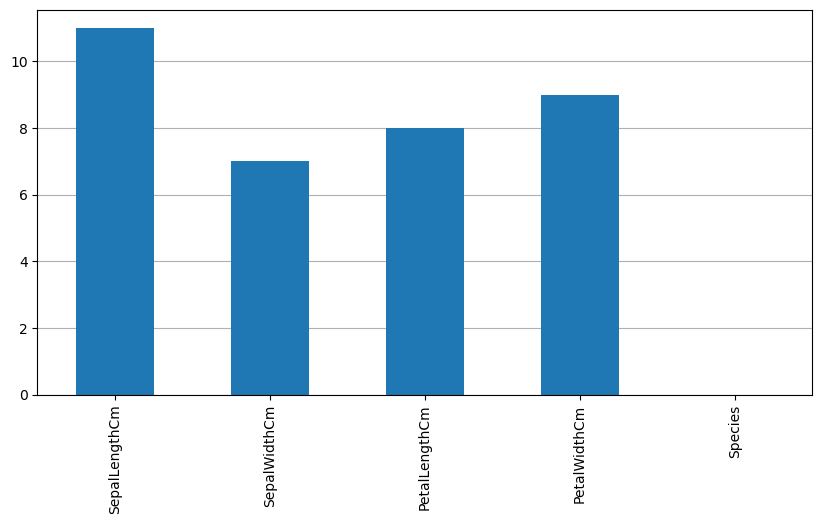

In [53]:
ax = data.drop(["Id"], axis=1).isnull().sum().plot(kind='bar', layout=(1,0), figsize=(10,5), zorder=2)
ax.grid(True,which="major", axis='y', zorder=1)

##### Visualise missing data using a heatmap:

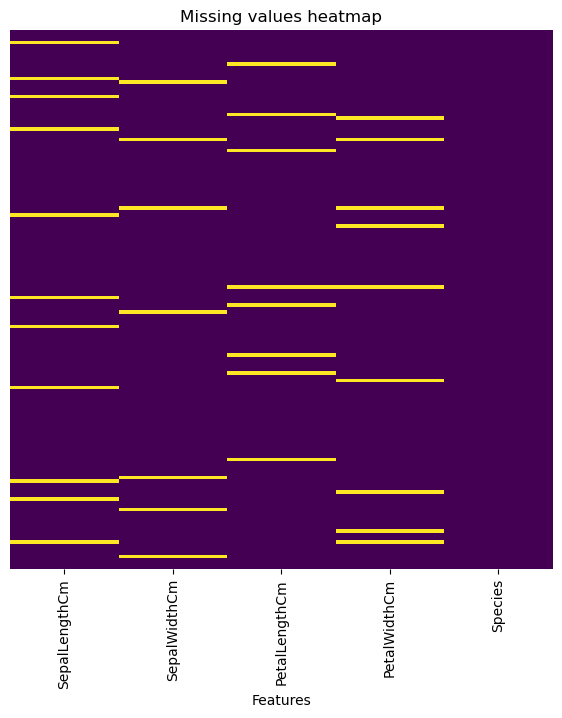

In [54]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data.drop(["Id"], axis=1).isna(),  cbar=False, yticklabels=False, cmap='viridis', ax=ax)
ax.set_title("Missing values heatmap")
ax.set_xlabel("Features")
ax.tick_params(axis='x', rotation=90)


##### Decide how to handle missing data (drop or fill) and apply changes:

Note:
There are three types of missing value in dataset:
1) Missing completely at random (MCAR).
2) Missing at random (MAT).
3) Misssing not at random (MNAT).

**Missing Completely at Random (MCAR):**


Definition: The probability of data being missing is not related to any other variables, observed or unobserved.

Example: A data entry error, a device malfunction, or a survey question being skipped due to a formatting issue in the software.

Impact: MCAR is the least problematic because removing the missing data points does not introduce bias. However, it's often an unrealistic assumption. 

**Missing at Random (MAR):**

Definition: The probability of data being missing depends on other variables that are already present in the dataset, but not on the missing value itself.

Example: A patient's visiting frequency data is missing, but their income is recorded. If lower-income patients are less likely to visit the doctor, the missingness is related to their income.

Impact: MAR is manageable because statistical models can often predict the missing values using the other observed variables to fill in the gaps. 

**Missing Not at Random (MNAR):**

Definition: The missingness is directly related to the value of the missing data itself, and cannot be explained by other observed variables.

Example: High-income individuals may not report their income, making the missing income value dependent on the income itself.

Impact: MNAR is the most problematic type, as it can lead to biased results. Simply removing these cases can cause significant bias because the remaining data is no longer representative. 


**Strategies for addressing missing data:**
1. Drop missing values: 
    - 5% or less of total values.
2. Impute mean, median, mode:
    - Depends on distribution and context.
3. Impute by sub-group:
    - Different experience levels have different median salary.
4. Impute by AI models.

In [55]:
threshold = len(data) * 0.05
print(threshold)
cols_to_drop = data.columns[data.isna().sum() <= threshold]
print(cols_to_drop)

7.5
Index(['Id', 'SepalWidthCm', 'Species'], dtype='object')


In [56]:
cols_with_missing_values = data.columns[data.isna().sum() > 0]
print(cols_with_missing_values)
for col in cols_with_missing_values[:-1]:
    data[col].fillna(data[col].mode()[0])

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


##### Check for duplicated rows and remove them if necessary:

In [57]:
data.duplicated().any()

np.False_

Duplicate the first row 

In [60]:
data.loc[len(data)] = data.loc[0]

Recheck the duplicate the rows:

In [61]:
data.duplicated().any()

np.True_

Display the duplicate rows:

In [62]:
data[data.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,1,5.1,3.5,1.4,0.2,Iris-setosa
151,1,5.1,3.5,1.4,0.2,Iris-setosa


##### Convert incorrect data types (e.g., change object to category or datetime):

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  139 non-null    float64
 2   SepalWidthCm   143 non-null    float64
 3   PetalLengthCm  142 non-null    float64
 4   PetalWidthCm   141 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
data["Species"] = pd.Categorical(data['Species'])

##### Detect outliers using boxplots:

**Global outliers (Point anomalies):**

These are individual data points that are significantly different from the majority of the dataset, both in value and behavior.

Example: A data point showing a person's age is 250 when most other are betweeen of 1 to 120.


**Contextual outliers (Conditional anomalies):**

These are data points that are only unusual given a specific context or condition.

Example: A temperature of 30°C is normal in summer but would be an outlier in winter.



**Collective outliers:**

These are a set of data points that are unusual as a group, but the individual points themselves might not be outliers on their own.

Example: A sudden, prolonged, and sustained drop in a stock's price over several minutes might be a collective outlier, even though each individual data point in that short timeframe could seem normal in isolation. 

<Axes: xlabel='SepalWidthCm'>

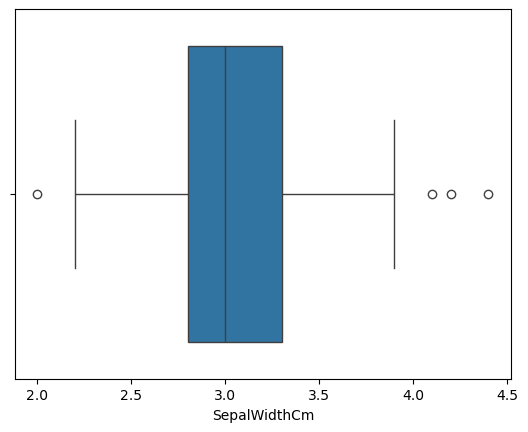

In [12]:
sns.boxplot(data=data, x="SepalWidthCm")

Apply simple techniques to handle outliers (e.g., capping or removing):
Calculate the upper and lower fences:

Lower Fence (whiskers): Q1-(1.5*IQR)

Upper Fence (whiskers): Q3+(1.5*IQR)

In [ ]:
threshold_low = data["SepalWidthCm"].quantile(0.25) - (1.5 * (data["SepalWidthCm"].quantile(0.75) - data["SepalWidthCm"].quantile(0.25)))
threshold_high = data["SepalWidthCm"].quantile(0.75) + (1.5 * (data["SepalWidthCm"].quantile(0.75) - data["SepalWidthCm"].quantile(0.25)))
data[(threshold_low< data["SepalWidthCm"] ) | (data["SepalWidthCm"] < threshold_high)]

##### Summarise the cleaning steps you performed and explain why: